<a href="https://colab.research.google.com/github/astroboylrx/CompHydroTutorial/blob/master/Astronomy_7A_Lecture_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> **Astronomy 7A: Introduction to Astrophysics** </center>

#<center> **Lecture 9: Kepler, Newton, Einstein, and the end of the Solar System** </center>

## <center> Dr. Rixin Li & Dr. J. J. Zanazzi </center>

## <center> Fall 2023  </center>

# **Today's Lecture**

*  ## Newton's Poor Cannonball
*  ## The Inverse Square Law of Gravity and Eccentric Orbits
*  ## Maundering Mercury and General Relativity
*  ## Chaos in the Solar System - Jupiter's Growth Spurt




---

# Install and import Python packages needed for today's class

## To execute a cell, one can click to choose the cell and click the play button on the left of each cell.

In [ ]:
!pip install rebound

In [3]:
import rebound
import numpy as np
import plotly.graph_objects as plygo
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 22})

# Section 1: **Newton's Cannon**

# In this exercise, we will work through a famous thought experiment.

<img src="https://galileo.ou.edu/sites/default/files/Newton-1728b-000tp.jpg" width="49%"/> <img src="https://galileo.ou.edu/sites/default/files/Newton-1728b-006pl.jpg" width="49%"/>

Credit: https://galileo.ou.edu/exhibits/treatise-system-world

## The force everyone feels on earth from gravity is
# $$ {\bf f} = -\frac{G M_\oplus}{r^2} {\bf {\hat r}}. $$
## Meanwhile, the acceleration of an object moving in a circle with velocity $v$, a distance $r$ from the circle's center, is
# $$ {\bf a} = - \frac{v^2}{r} {\bf {\hat r}}. $$
## Setting ${\bf f} = {\bf a}$ gives
# $$ v_{\rm circ} = \sqrt{ \frac{G M_\oplus}{r} }. $$
##When $r=R_\oplus$, $v_{\rm circ} = 7.9 \ {\rm km/s}$.

# **Question:** If one fires a cannonball perpendicular to the Earth's surface with a velocity $v_{\rm circ}$, what trajectory will the cannonball take?

## Below, we will experimentally answer this question using the N-body integrator Rebound.

In [5]:
G = 1.0                      # Newton's gravitational constant in Rebound units
Mearth = 1.0                 # Mass of Earth in Rebound units
Rearth = 1.0                 # Radius of the Earth in Rebound units
D_launch = 0.1               # Height of cannon
V_launch = np.sqrt(G*Mearth/(Rearth+D_launch))   # Velocity we launch cannonball at

sim = rebound.Simulation()
sim.add(m=Mearth)                # Adding earth
p = rebound.Particle()           # The cannonball
p.y = Rearth + D_launch          # Cannonball height
p.vx = V_launch                  # Cannonball velocity
sim.add(p)

Nt = 100
time_end = 2.*np.pi/np.sqrt(G*Mearth/(Rearth+D_launch)**3)
times = np.linspace(0., time_end, Nt)
px = np.zeros(Nt)
py = np.zeros(Nt)
for i,time in enumerate(times):  # Where we integrate the fate of the poor cannonball...
  sim.integrate(time)
  px[i] = sim.particles[1].x
  py[i] = sim.particles[1].y

## Lets plot the fate of our cannonball.  In our plot, the triangle is the cannon's location, while the dashed circle is the surface of the Earth.

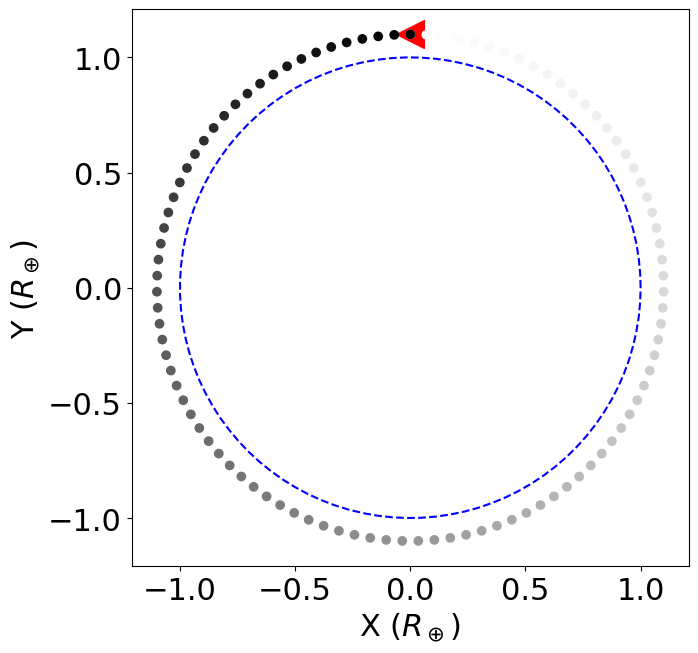

In [ ]:
phi_earth = np.linspace(0., 2.*np.pi, 100)
Rearth = 1.0
x_earth = Rearth*np.cos(phi_earth)
y_earth = Rearth*np.sin(phi_earth)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [Rearth+D_launch,], marker='<', s=4e2, c='r')
ax.plot(x_earth, y_earth, 'b--')
ax.scatter(px, py, c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X ($R_\oplus$)', ylabel='Y ($R_\oplus$)')
fig.tight_layout()

## **Question:** What happens if the canonball is fired at a velocity less than $v_{\rm circ}$?  Greater than $v_{\rm circ}$?  Much greater than $v_{\rm circ}$?

### Let's find out!  Change the ```p.vx``` value below.  We have started off with a value smaller than $v_{\rm circ}$.



In [ ]:
G = 1.0                      # Newton's gravitational constant in Rebound units
Mearth = 1.0                 # Mass of Earth in Rebound units
Rearth = 1.0                 # Radius of the Earth in Rebound units
D_launch = 0.1               # Height of cannon
V_circ = np.sqrt(G*Mearth/(Rearth+D_launch))   # Velocity we launch cannonball at

sim = rebound.Simulation()
sim.add(m=Mearth)                # Adding earth
p = rebound.Particle()           # The cannonball
p.y = Rearth + D_launch          # Cannonball height

################################################################
# Change the coefficient of V_circ, which scales the Cannonball velocity
################################################################
p.vx = 0.5 * V_circ

sim.add(p)

Nt = 100
time_end = 2.*np.pi/np.sqrt(G*Mearth/(Rearth+D_launch)**3)
times = np.linspace(0., time_end, Nt)
px = np.zeros(Nt)
py = np.zeros(Nt)
for i,time in enumerate(times):  # Where we integrate the fate of the poor cannonball...
  sim.integrate(time)
  px[i] = sim.particles[1].x
  py[i] = sim.particles[1].y

## Cannonbaaaaall!

In [ ]:
# plot
phi_earth = np.linspace(0., 2.*np.pi, 100)
Rearth = 1.0
x_earth = Rearth*np.cos(phi_earth)
y_earth = Rearth*np.sin(phi_earth)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [Rearth+D_launch,], marker='<', s=4e2, c='r')
ax.plot(x_earth, y_earth, 'b--')
ax.scatter(px, py, c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X ($R_\oplus$)', ylabel='Y ($R_\oplus$)')
fig.tight_layout()

---

# **The Inverse Square Law of Gravity and elliptical orbits**

## Lets start with a circular orbit, like we covered in the last exercise.  Now, we will have the object travel around the Sun, not the Earth

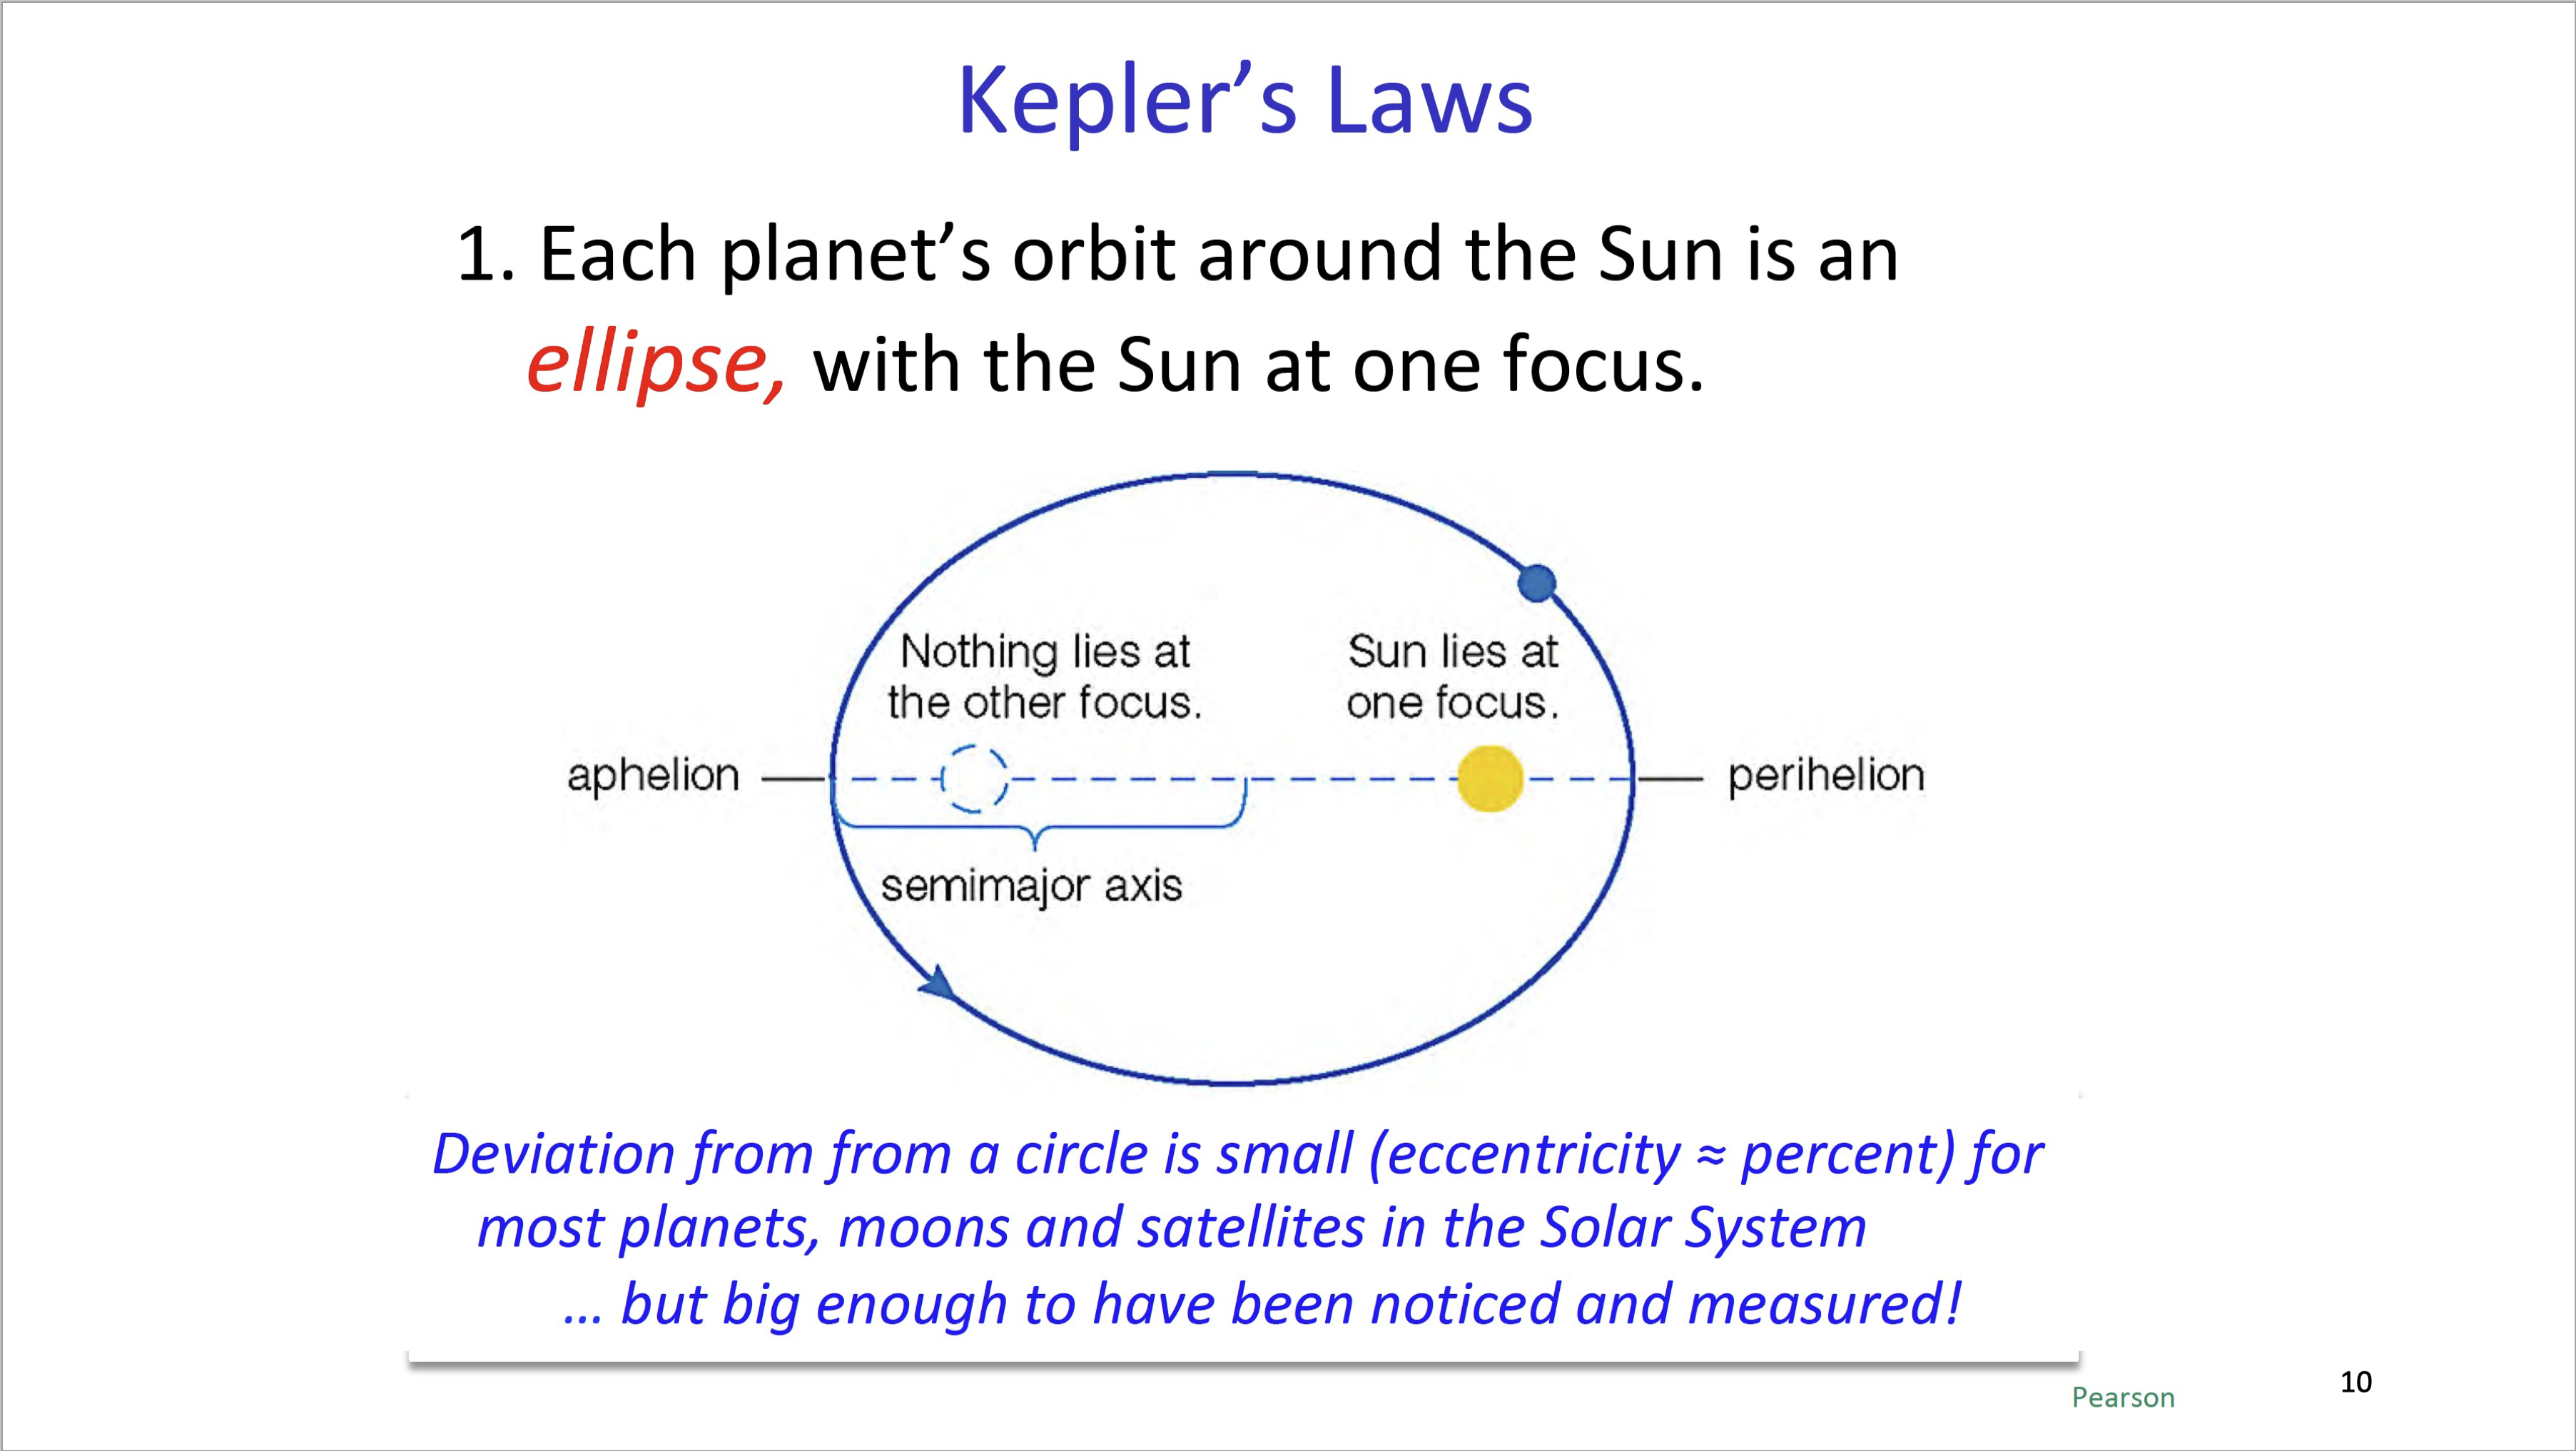

In [7]:
G = 1.                     # Rebound units
m0 = 1.                    # mass of central object
m1 = 0.                    # Companion is test particle
a1 = 3.                    # semi-major axis: This is 3 au in Rebound units

sim = rebound.Simulation() # initialize the rebound simulation object
sim.add(m=m0, )            # add the primary particle in the center as Sun, in this code unit, GM_sun = 1
sim.add(m=m1, a=a1)        # add a test planet orbiting the Sun at 3 AU, rebound will calculate velocity automatically
ps = sim.particles

# now let's integrate the orbit for one period and record the location 100 times
loc_record = np.zeros((100, 2))
P = 2*np.pi/np.sqrt(G*m0/a1**3)
sim.dt = P / 100
times = np.arange(100) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[1].x, ps[1].y

Now lets plot the orbit we just integrated

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y')
fig.tight_layout()


## Lets replace the primary (the sun) with a central force

# $$ \displaystyle {\bf f} = -\frac{GM_\odot}{r^2} {\bf {\hat r}} $$

### This part is just a technical switch, the results should be the same (and we will find out they are)

In [ ]:
sim = rebound.Simulation() # initialize the rebound simulation object
#sim.add(m=1, )            # comment out the primary object
m0, m1, a1, v_circ = 1., 0., 3., np.sqrt(G*m0/a1)
sim.add(m=0, x=a1, vy=v_circ) # add a test planet, this time, we need to provide the initial location and velocity
ps = sim.particles

# add additional force that is similar to what the Sun would provide
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[0].y, ps[0].x)
    _r = np.sqrt(ps[0].x**2 + ps[0].y**2)
    ps[0].ax = (1/_r**2) * (-np.cos(_phi))
    ps[0].ay = (1/_r**2) * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for one period and record the location 100 times
loc_record = np.zeros((100, 2))
P = 2*np.pi/np.sqrt(G*m0/a1**3)
sim.dt = P / 100
times = np.arange(100) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[0].x, ps[0].y

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y')
fig.tight_layout()

## Similar to canonball, if we offset the velocity from $v_{\rm circ}$, we can create an eccentric orbit.

### Notice the ```vy = 0.8*v_circ``` line below.  What happens if this velocity is zero?  Very large?


In [ ]:
sim = rebound.Simulation() # initialize the rebound simulation object
#sim.add(m=1, )            # comment out the primary object
m0, m1, x1, v_circ = 1., 0., 3., np.sqrt(G*m0/a1)

################################################################
# this time, we reduce the initial velocity by 0.8
sim.add(m=m1, x=x1, vy = 0.8*v_circ)
################################################################

ps = sim.particles
# add additional force that is similar to what the Sun would provide
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[0].y, ps[0].x)
    _r = np.sqrt(ps[0].x**2 + ps[0].y**2)
    ps[0].ax = (1/_r**2) * (-np.cos(_phi))
    ps[0].ay = (1/_r**2) * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for one period and record the location 100 times
loc_record = np.zeros((100, 2))
P = 2*np.pi * x1**(3/2)                       # End time: roughly an orbital period
sim.dt = P / 100
times = np.arange(100) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[0].x, ps[0].y

Here we plot our orbit

In [ ]:
# now we draw the orbit we just integrated
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y'); ax.grid(True, alpha=0.3)
fig.tight_layout()

## **Discussion**: What if gravity does not obey the inverse square law?  What if the force goes like

# $$ {\bf f} = -\frac{K M_\odot}{r^p} {\bf \hat r} $$

## and $p \ne 2$?


## In the example below, we have choosen $p=1$. What happens for different $p$ values?

In [ ]:
sim = rebound.Simulation() # initialize the rebound simulation object
#sim.add(m=1, )            # comment out the primary object
m0, m1, x1, v_circ = 1., 0., 3., np.sqrt(G*m0/a1)

################################################################
# New powerlaw for force, experiment with different values!
p = 1.0
# we again reduce the initial velocity by 0.8
sim.add(m=m1, x=x1, vy = 0.8*v_circ)
################################################################

ps = sim.particles
# add additional force that is similar to what the Sun would provide
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[0].y, ps[0].x)
    _r = np.sqrt(ps[0].x**2 + ps[0].y**2)
    ps[0].ax = (1/_r**p) * (-np.cos(_phi))
    ps[0].ay = (1/_r**p) * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for four period and record the location 200 times per orbits
loc_record = np.zeros((800, 2))
P = 2*np.pi * x1**(3/2)
sim.dt = P / 200
times = np.arange(800) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[0].x, ps[0].y

In [ ]:
# now we draw the trajectory we just integrated
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y'); ax.grid(True, alpha=0.3)
fig.tight_layout()

## **Expirement**: Try different values of `p` and `vy`, and plot the resulting orbit.  What does this mean for orbital stability?  Habitability?  

In [ ]:
%%capture --no-display
sim = rebound.Simulation() # initialize the rebound simulation object
#sim.add(m=1, )            # comment out the primary object
m0, m1, x1, v_circ = 1., 0., 3., np.sqrt(G*m0/a1)

################################################################
# New powerlaw for force, experiment with different values!
p = 3.0
# also experiment with different initial velocity for "vy"
sim.add(m=m1, x=x1, vy = 0.55*v_circ)
################################################################
ps = sim.particles

# add additional force that is similar to what the Sun would provide
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[0].y, ps[0].x)
    _r = np.sqrt(ps[0].x**2 + ps[0].y**2)
    ps[0].ax = (1/_r**p) * (-np.cos(_phi))
    ps[0].ay = (1/_r**p) * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for four period and record the location 200 times per orbits
loc_record = np.zeros((800, 2))
P = 2*np.pi * x1**(3/2)
sim.dt = P / 200
times = np.arange(800) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[0].x, ps[0].y

# now we draw the trajectory we just integrated
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y'); ax.grid(True, alpha=0.3)
fig.tight_layout()

## **General Relativity**: Here, we investigate what happens to the orbit of Mercury, including the main effect from GR.

### Einstein predicted Gravity travels at the speed of light.  He worked out this works similarly to adding an extra force to the inverse square law:

# $$ \displaystyle {\bf f}_{\rm GR} = \frac{12 G^2 M^2}{c^2 r^3} {\bf {\hat r}} $$

### Based off of what we worked out in the previous exercise, what will this do to an elliptical orbit?

In [ ]:
sim = rebound.Simulation() # initialize the rebound simulation object
m0 = 1.
sim.add(m=m0)    # The sun
m1 = 1.66e-7     # mass of mercury
a1 = 0.387       # semi-major axis of mercury
e1 = 0.206       # eccentricity of mercuty
sim.add(m=m1, a=a1, e=e1) # ading in the orbit of mercury
ps = sim.particles
c = 10064.915    # Speed of light in rebound units

# add additional force from GR
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[1].y, ps[1].x)
    _r = np.sqrt(ps[1].x**2 + ps[1].y**2)
    ps[1].ax += 12.*m0**2./c**2./_r**3 * (-np.cos(_phi))
    ps[1].ay += 12.*m0**2./c**2./_r**3 * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for four period and record the location 200 times per orbits
loc_record = np.zeros((800, 2))
P = 2*np.pi * a1**(3/2)
sim.dt = P / 200
times = np.arange(800) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[1].x, ps[1].y

In [ ]:
# now we draw the trajectory we just integrated
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y'); ax.grid(True, alpha=0.3)
fig.tight_layout()

## This did not do much over 4 orbits, lets "accelerate" GR by decreasing the speed of light, and increasing the eccentricity of Mercury

In [ ]:
sim = rebound.Simulation() # initialize the rebound simulation object
m0 = 1.
sim.add(m=m0)    # The sun
m1 = 1.66e-7     # mass of mercury
a1 = 0.387       # semi-major axis of mercury
e1 = 0.6       # Large mercury eccentricity
sim.add(m=m1, a=a1, e=e1) # ading in the orbit of mercury
ps = sim.particles
c = 30.    # Decreasing the speed of light

# add additional force from GR
def central_force(reb_sim):
    # calculate the location of the test planet (r, phi) and apply the central force and x and y
    _phi = np.arctan2(ps[1].y, ps[1].x)
    _r = np.sqrt(ps[1].x**2 + ps[1].y**2)
    ps[1].ax += 12.*m0**2./c**2./_r**3 * (-np.cos(_phi))
    ps[1].ay += 12.*m0**2./c**2./_r**3 * (-np.sin(_phi))
sim.additional_forces = central_force

# now let's integrate the orbit for four period and record the location 200 times per orbits
loc_record = np.zeros((800, 2))
P = 2*np.pi * a1**(3/2)
sim.dt = P / 200
times = np.arange(800) * sim.dt
for i, t in enumerate(times):
    sim.integrate(t)
    loc_record[i] = ps[1].x, ps[1].y

In [ ]:
# now we draw the trajectory we just integrated
fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter([0,], [0,], marker='*', s=4e2, c='r')
ax.scatter(loc_record[:, 0], loc_record[:, 1], c=times, cmap='Greys')
ax.set(aspect=1.0, xlabel='X', ylabel='Y'); ax.grid(True, alpha=0.3)
fig.tight_layout()

# **Disscusion**: What is happening?  What did Einstein predict?

---

# **The Solar System**

![ss](https://images7.alphacoders.com/502/502983.jpg)

## It is easy to initialize the solar system with `rebound`

In [ ]:
sim = rebound.Simulation()
rebound.data.add_solar_system(sim)

## We can now visualize the orbits of the solar system planets (length in units of AU).

In [ ]:
ops = rebound.OrbitPlotSet(sim, figsize=(8, 7), particles=[1,2,4,6,7,8]) # plot the orbits of all planets besides earth and jupiter, which are plotted separately with colors
op_earth = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[3], lw=3, color='blue')
op_jup = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[5], lw=3, color='brown')
ops.fig.tight_layout()

 ## Here we zoom-in to the inner solar system.

In [ ]:
ops = rebound.OrbitPlotSet(sim, figsize=(8, 7), particles=[1,2,4,6,7,8]) # plot the orbits of all planets besides earth and jupiter, which are plotted separately with colors
op_earth = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[3], lw=3, color='blue')
op_jup = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[5], lw=3, color='brown')
ops.ax_main.set(xlim=[-5, 5], ylim=[-5, 5])
ops.fig.tight_layout()

# **Discussion**: What if Jupiter suddenly has the mass of the Sun? What might happen?

In [ ]:
sim.particles[5].m=1  # change Jupiter's mass to the same as the Sun

In [ ]:
ops = rebound.OrbitPlotSet(sim, figsize=(8, 7), particles=[1,2,4,6,7,8]) # plot the orbits of all planets besides earth and jupiter, which are plotted separately with colors
op_earth = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[3], lw=3, color='blue')
op_jup = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[5], lw=3, color='brown')
ops.fig.tight_layout()

In [ ]:
ops = rebound.OrbitPlotSet(sim, figsize=(8, 7), particles=[1,2,4,6,7,8]) # plot the orbits of all planets besides earth and jupiter, which are plotted separately with colors
op_earth = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[3], lw=3, color='blue')
op_jup = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[5], lw=3, color='brown')
ops.ax_main.set(xlim=[-5, 5], ylim=[-7, 3])
ops.fig.tight_layout()

## Categories of planets around a binary system.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Planets_in_binary_star_systems_-_P-_and_S-type.svg/1200px-Planets_in_binary_star_systems_-_P-_and_S-type.svg.png" width="350px">
<img src="https://www.syfy.com/sites/syfy/files/styles/hero_image__large__computer__alt_1_5x/public/starwars_tattooine_binary_sunset.jpg" width="500px">

## Now we integrate the system for 2.5 years, and allow Jupiter to enter the inner solar system

In [ ]:
sim.integrate(2.5 * 2*np.pi)
sim.move_to_com()

### After 2.5 years, all the orbits of the inner planets becomes very eccentric! Their orbits intersect with each other!!

In [ ]:
ops = rebound.OrbitPlotSet(sim, figsize=(8, 7), particles=[1,2,4,]) # plot inner planets plus Jupiter
op_earth = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[3], lw=3, color='blue')
op_jup = rebound.OrbitPlotSet(sim, fig=ops.fig, ax=ops.fig.axes, particles=[5], lw=3, color='brown')
ops.ax_main.set(xlim=[-2, 5.5], ylim=[-5, 2.5])
ops.fig.tight_layout()

# **Fun time!** Let's put the chaotic orbits in 3D

In [ ]:
# obtain the orbits information from rebound so we can use plotly to plot them in 3D
orbits = []
for idx in range(1, 9): # inner planets + Jupiter
  _o = np.array(sim.particles[idx].sample_orbit(Npts=256, primary=sim.particles[0], duplicateEndpoint=True))
  orbits.append(np.vstack([_o, _o[0]]))

## **Drag** any place to rotate; **scroll** to zoom; **ctrl+drag** (or **right-click+drag**) to pan; **Hover** on planet or orbit to show the information

In [ ]:
## References:
#      https://plotly.com/python/3d-scatter-plots/

layout = plygo.Layout(width=1200, height = 750, autosize = True, showlegend = False, font = {'size': 16},
                      scene=dict(aspectratio=dict(x=1, y=1, z=0.2),
                                 camera=dict(center = dict(x = 0,y = 0,z = -0.2), eye = dict(x = -0.8, y = -0.35, z = 0.7)),
                                 xaxis=dict(range=[-3, 7]), yaxis=dict(range=[-6, 4]), zaxis=dict(range=[-1, 1])))
data = [plygo.Scatter3d(x = [sim.particles[0].x, ], y = [sim.particles[0].y, ], z = [sim.particles[0].z, ], name='Sun',
                        marker = dict(size = 6, symbol='diamond', color='orange'),),]
colors = ['black',   'black', 'blue',  'black', 'brown',   'black',  'black',  'black'];
names =  ['Mercury', 'Venus', 'Earth', 'Mars',  'Jupiter', 'Saturn', 'Uranus', 'Neptune']
for idx, item in enumerate(orbits):
    data.append(plygo.Scatter3d(x = [sim.particles[idx+1].x, ], y = [sim.particles[idx+1].y, ], z = [sim.particles[idx+1].z, ],
                    marker = dict(size = 5, symbol='circle', color=colors[idx]), name=names[idx], ), )
    data.append(plygo.Scatter3d(x = orbits[idx][:, 0], y = orbits[idx][:, 1], z = orbits[idx][:, 2], mode='lines', name=names[idx],
                    marker = dict(size = 0, line=dict(width=0)), line = dict(width = 5, color = colors[idx]), hoverinfo='name'),)

fig = plygo.Figure(layout = layout, data = data)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0), )
fig.show()